# Prevendo Salário de jogadores da NBA
### NBA é a sigla para National Basketball Association (Associação Nacional de Basquete), a liga profissional de basquete masculino dos Estados unidos.Ela é conhecida por ser a maior e mais importante liga de basquete do mundo.

## Dataset
#### Este dataset contem informações estatísticas de cada jogador da NBA.
#### Abaixo a descrição de cada campo:

Season Start -> Ano de inicio da temporada

Player Name -> Nome do jogador

Player Salary -> Valor do salario anual do jogador

Pos -> Posição do jogador

Age -> Idade do jogador

Tm -> Time em que o jogador atua

G -> Número de jogos disputados

GS -> Número de Jogos iniciado como titular

MP -> Total de minutos jogados  

PER (Player Efficiency Rating) -> Taxa de Eficiencia do Jogador (A medida é padronizada de acordo com a média da liga, que é de 15.)

TS% (True Shooting Percentage) -> Percentual de arremessos (considera todos os tipos de arremessos)

3PAr (3-Point Attempt Rate) -> Taxa de tentativa de arremesso de 3-pontos

FTr (Free Throw Attempt Rate) -> Taxa de lance livre

ORB%(Offensive Rebound Percentage) -> Percentual de rebotes ofensivos

DRB% (Defensive Rebound Percentage)-> Percentual de rebotes defensivos

TRB% (Total Rebound Percentage)-> Percentual total de rebotes 

AST% (Assist Percentage)-> Percentual de assistência

STL% (Steal Percentage)-> Percentual de roubos de bola

BLK% (Block Percentage)-> Percentual de bloqueios

TOV% (Turnover Percentage)-> Percentual de turnover (deperdicio de bola)

USG% (Usage Percentage)-> Percentual de jogadas em que o jogador foi utilizado

OWS (Offensive Win Shares)-> Estimativa de numero de vitórias contribuidas pelo jogador devido ao seu ataque

DWS (Defensive Win Shares)-> Estimativa de numero de vitórias contribuidas pelo jogador devido a sua defesa

WS (Win Shares)-> Estimativa de numeros de vitórias contribuidas pelo jogador

WS/48 (Win Shares Per 48 Minutes) -> Estimativa de numeros de vitórias contribuidas pelo jogador por 48 minutos (media da liga é 0,100)

OBPM (Offensive Box Plus/Minus) -> Estimativa de pontos no ataque por 100 posses que um jogador contribuiu sobre a media da liga de um jogador. Estimativa convertida para a média do time

DBPM (Defensive Box Plus/Minus) -> Estimativa de pontos na defesa por 100 posses que um jogador contribuiu sobre a media da liga de um jogador. Estimativa convertida para a média do time

BPM (Box Plus/Minus)-- Estimativa total (OBPM + DBPM)

VORP (Value over Replacement Player)-> Estimativa de pontos por 100 posses do time que um jogador contribuiu sobre um jogador de nivel reserva a media da liga de um jogador.Estimativa convertida para a media do time e proporcional a 82 jogos



## Objetivo
### Nosso objetivo é prever o salário de um jogador da NBA e gostariamos também de responder as seguintes questões:
#### 1- Qual é a distribuição dos salários por posição?
#### 2- Qual é a media salarial por posição?
#### 3- Quais são os 5 times que possuem as maiores despesas com salário?

## 1- Importação das Bibliotecas.

In [1]:
# Manipulação de dados e arquivos
import pandas as pd 
import numpy as np
# Visualização 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Estatistica 
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats as stats

In [3]:
# Pacote Regressão linear do SKlearn
from sklearn.linear_model import LinearRegression
# avaliação dos modelos
from sklearn.metrics import mean_squared_error, make_scorer
# Normalizaçao de dados
from sklearn.preprocessing import StandardScaler
# Divisao de arquivo treino e teste
from sklearn.model_selection import train_test_split
#Cross validation
from sklearn.model_selection import cross_val_score
#Ridge e Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

## 2- Exploração de Dados

In [4]:
#Importação o arquivo
df_salario = pd.read_excel('/media/sf_FormacaoCientistaDeDados/Portfolio/Stats_salary/NBA_Players.xlsx',encoding='latin-1')

In [5]:
#resumo das informaçoes sobre o dataset
df_salario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24625 entries, 0 to 24624
Data columns (total 54 columns):
#                     24624 non-null float64
Season Start          24624 non-null float64
Player Name           24624 non-null object
Player Salary in $    10978 non-null object
Pos                   24624 non-null object
Age                   24616 non-null float64
Tm                    24624 non-null object
G                     24624 non-null float64
GS                    18233 non-null float64
MP                    24138 non-null float64
PER                   24101 non-null float64
TS%                   24538 non-null float64
3PAr                  18839 non-null float64
FTr                   24525 non-null float64
ORB%                  20792 non-null float64
DRB%                  20792 non-null float64
TRB%                  21571 non-null float64
AST%                  22555 non-null float64
STL%                  20792 non-null float64
BLK%                  20792 non-null flo

### De acordo com a informação acima, vamos retirar as colunas "blanl" e "blank2" , alterar a coluna referente ao salário para para o tipo de dado float e renomear algumas variáveis.

In [6]:
# Remove as colunas
df_salario.drop(["#",'blanl','blank2'],axis= 1 ,inplace=True)
# Alteração das colunas 
df_salario.rename(columns={'Season Start': 'Start','Player Name':'Player','Player Salary in $':'Salary'},inplace=True)

In [7]:
#removendo registros sem salario
df_salario  = df_salario[df_salario['Salary'].notnull()]

In [10]:
# vamos considerar os dados da temporada 1990 a 1994
df_salario = df_salario[(df_salario['Start']>=1990 ) & (df_salario['Start']<=1994)]

In [11]:
df_salario.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1640 entries, 4 to 24476
Data columns (total 51 columns):
Start     1640 non-null float64
Player    1640 non-null object
Salary    1640 non-null object
Pos       1640 non-null object
Age       1640 non-null float64
Tm        1640 non-null object
G         1640 non-null float64
GS        1640 non-null float64
MP        1640 non-null float64
PER       1640 non-null float64
TS%       1638 non-null float64
3PAr      1636 non-null float64
FTr       1636 non-null float64
ORB%      1640 non-null float64
DRB%      1640 non-null float64
TRB%      1640 non-null float64
AST%      1640 non-null float64
STL%      1640 non-null float64
BLK%      1640 non-null float64
TOV%      1638 non-null float64
USG%      1640 non-null float64
OWS       1640 non-null float64
DWS       1640 non-null float64
WS        1640 non-null float64
WS/48     1640 non-null float64
OBPM      1640 non-null float64
DBPM      1640 non-null float64
BPM       1640 non-null float64


In [12]:
#remove valore nulos da variável "2P%"
df_salario = df_salario[df_salario['2P%'].notnull()]

In [13]:
# Convertendo coluna para float
df_salario['Salary'] = df_salario['Salary'].astype('float')

### Há uma quantidade considerável de valor nulo no campo "3P%" 3 "FT%". Isso quer dizer que esses jogadores não realizaram um arremesso de 3 pontos e não relaizaram arremesso de lance livre (FT%). Nesse caso vamos atribuir o valor 0.

In [14]:
#Preenchendo valores 
df_salario.loc[df_salario['FT%'].isnull(), ['FT%']] = 0
df_salario.loc[df_salario['3P%'].isnull(), ['3P%']] = 0

In [15]:
#Visualiza as primeiras linhas do arquivo
df_salario.describe()

,Start,Salary,Age,G,GS,MP,PER,TS%,3PAr,FTr,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,1635.000000,1.635000e+03,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,...,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.00000,1635.000000,1635.000000
mean,1991.975535,1.175117e+06,26.826911,59.936391,31.558410,1490.031193,13.561101,0.517369,0.084298,0.332465,...,0.722780,86.201835,181.272783,267.474618,151.984709,53.674618,32.100917,95.24893,139.198777,656.022630
std,1.390434,9.196166e+05,3.544611,23.757411,31.280888,939.867752,4.740310,0.074399,0.108156,0.197331,...,0.149483,76.301083,154.259375,225.160821,164.618621,44.334415,44.593488,68.45051,81.981886,516.865762
min,1990.000000,1.315800e+04,20.000000,1.000000,0.000000,2.000000,-11.100000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1991.000000,5.000000e+05,24.000000,46.000000,2.000000,653.500000,11.100000,0.489000,0.007000,0.226000,...,0.671500,27.000000,63.000000,92.000000,36.500000,19.000000,6.000000,40.00000,70.000000,231.000000
50%,1992.000000,9.500000e+05,26.000000,70.000000,19.000000,1483.000000,13.500000,0.524000,0.037000,0.307000,...,0.750000,65.000000,147.000000,214.000000,104.000000,44.000000,17.000000,85.00000,142.000000,560.000000
75%,1993.000000,1.625000e+06,29.000000,79.500000,65.000000,2289.000000,15.900000,0.554000,0.125500,0.400000,...,0.810500,122.500000,257.000000,383.500000,204.500000,78.000000,40.000000,140.00000,200.500000,1003.000000
max,1994.000000,7.300000e+06,40.000000,83.000000,82.000000,3533.000000,76.300000,1.064000,0.682000,3.000000,...,1.000000,523.000000,1007.000000,1530.000000,1164.000000,246.000000,376.000000,334.00000,338.000000,2753.000000


### Verificando número de registros distintos

In [16]:
df_salario.nunique()

Start        5
Player     497
Salary     603
Pos         11
Age         21
Tm          28
G           83
GS          83
MP        1257
PER        239
TS%        292
3PAr       343
FTr        512
ORB%       178
DRB%       252
TRB%       199
AST%       358
STL%        55
BLK%        77
TOV%       226
USG%       246
OWS        128
DWS         74
WS         160
WS/48      320
OBPM       178
DBPM       123
BPM        202
VORP       100
FG         606
FGA        922
FG%        274
3P         128
3PA        257
3P%        277
2P         588
2PA        878
2P%        272
eFG%       282
FT         399
FTA        479
FT%        415
ORB        291
DRB        487
TRB        622
AST        453
STL        188
BLK        174
TOV        268
PF         316
PTS        998
dtype: int64

### Este dataset está exibindo os dados por jogador, ano e time que atuou.
### Vamos agrupar os registros por jogador e ano. 
### Primeiro, vamos identificar se há registros de jogadores em mais de uma Posição ("Pos")

In [17]:
#selecionando jogadores com mais de um registro
df_salario[['Player','Start','Pos']].drop_duplicates().groupby(['Player','Start','Pos']).size().to_frame('qtd').reset_index().query('qtd> 1')


,Player,Start,Pos,qtd


### Selecionando jogadores em que atuaram por mais de um time em um mesmo ano

In [18]:
df_salario.groupby(['Player','Start','Pos'])['Tm'].size().reset_index().query('Tm > 1').head()

,Player,Start,Pos,Tm
16,Alaa Abdelnaby,1993.0,PF,3
35,Alvin Robertson,1993.0,SG,3
36,Andre Spencer,1993.0,SF,3
37,Andre Turner,1990.0,PG,3
62,Antoine Carr,1990.0,PF,3


In [19]:
#Verificando jogador
df_salario[df_salario['Player']=='Alton Lister']

,Start,Player,Salary,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
609,1990.0,Alton Lister,1700000.0,C,31.0,GSW,3.0,0.0,40.0,10.9,...,0.571,5.0,3.0,8.0,2.0,1.0,0.0,0.0,8.0,12.0
610,1991.0,Alton Lister,1333000.0,C,32.0,GSW,77.0,65.0,1552.0,10.7,...,0.569,121.0,362.0,483.0,93.0,20.0,90.0,106.0,282.0,491.0
611,1992.0,Alton Lister,1283000.0,C,33.0,GSW,26.0,12.0,293.0,11.2,...,0.424,21.0,71.0,92.0,14.0,5.0,16.0,20.0,61.0,102.0


## Agrupando os jogadores por ano e posição através da variavel "MP" (minutos jogados)

In [20]:
df_salario_group = df_salario.groupby(['Player','Start','Pos'])['MP'].max().reset_index()

In [21]:
# Realizando o cruzamento dos dataframes df_salario e df_salario_group
df_salario= df_salario.merge(df_salario_group[['Player','Start','MP']],left_on=['Player','Start','MP']
                                          ,right_on=['Player','Start','MP'],how='inner')

In [22]:
#Verificando jogador
df_salario[df_salario['Player']=='Alton Lister']

,Start,Player,Salary,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
29,1990.0,Alton Lister,1700000.0,C,31.0,GSW,3.0,0.0,40.0,10.9,...,0.571,5.0,3.0,8.0,2.0,1.0,0.0,0.0,8.0,12.0
30,1991.0,Alton Lister,1333000.0,C,32.0,GSW,77.0,65.0,1552.0,10.7,...,0.569,121.0,362.0,483.0,93.0,20.0,90.0,106.0,282.0,491.0
31,1992.0,Alton Lister,1283000.0,C,33.0,GSW,26.0,12.0,293.0,11.2,...,0.424,21.0,71.0,92.0,14.0,5.0,16.0,20.0,61.0,102.0


## Salvando arquivo

In [22]:
df_salario.to_csv('nba_salario.csv')

In [21]:
df_salario['Salary'].head(10)

0    1750000.0
1    1750000.0
2    1750000.0
3    1885000.0
4    6472600.0
5    6473000.0
6    4851000.0
7     325000.0
8     406000.0
9     130000.0
Name: Salary, dtype: float64

### Distribuição dos dados

Skew: 1.506195396403737
Kurtosis : 3.8794907195837087


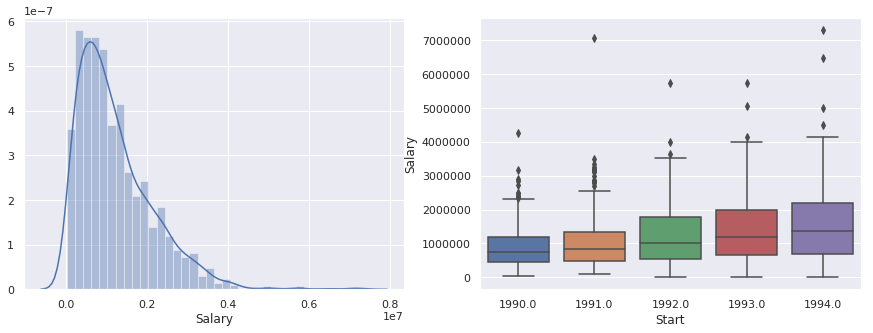

In [23]:
print('Skew:' ,df_salario['Salary'].skew())
print('Kurtosis :',df_salario['Salary'].kurt())

sns.set()
fig,axes=plt.subplots(1,2, figsize=(15,5))
# Plot de Distribuição
sns.distplot(df_salario['Salary'],ax =axes[0]);
# Boxplot
sns.boxplot(df_salario['Start'],df_salario['Salary'],ax =axes[1]);


### No gráfico de distribuição acima, vimos que há uma distorção com skew positivo.
### Observando o grafico de boxplot acima, percebe-se que há uma tendencia de aumento dos salários.
### Ao longo dos anos, cresce o número de outliers.

## Respondendo as Questões 
### 1- Qual é a distribuição dos salarios por posição?

### Primeiro vamos padronizar as posições dos jogadores, afim de facilitar nossas análises
### No Basquete as 5 posiçoes básicas são:
SG = Ala-Armador
<br>PF = Ala-Pivô
<br>PG = Armador
<br>SF = Ala
<br>C = Pivô

In [24]:
# Padronizando as posições
df_salario.loc[df_salario['Pos']=='SG-PG','Pos']='SG'
df_salario.loc[df_salario['Pos']=='PF-C','Pos']='PF'
df_salario.loc[df_salario['Pos']=='PG-SG','Pos']='PG'
df_salario.loc[df_salario['Pos']=='SF-PF','Pos']='SF'
df_salario.loc[df_salario['Pos']=='SG-PG','Pos']='SG'
df_salario.loc[df_salario['Pos']=='SF-SG','Pos']='SF'
df_salario.loc[df_salario['Pos']=='C-PF','Pos']='C'
df_salario.loc[df_salario['Pos']=='PF-SF','Pos']='PF'
df_salario.loc[df_salario['Pos']=='SG-SF','Pos']='SG'

In [25]:
#agrupando por "Pos"
df_group_pos = df_salario.groupby('Pos')
#gera arquivo com os dados agupados por 'Pos'
dados = df_group_pos['Salary'].mean().reset_index().sort_values('Salary',ascending=False)
# cria coluna com % de Salario
dados['% Sal_Pos'] = round(dados['Salary']/dados['Salary'].sum(),3)*100


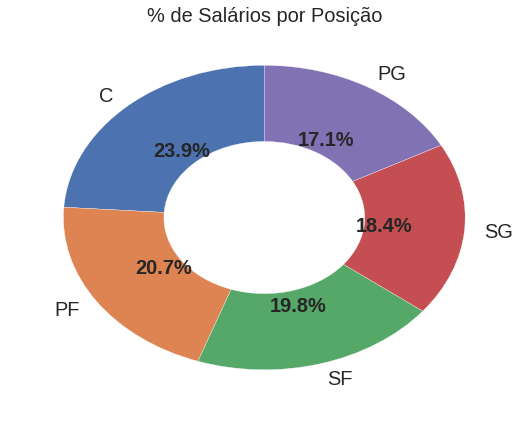

In [26]:
#gera o gráfico
#define tamanho do plot
fig,axes=plt.subplots(figsize=(9,7))
#gera o grafico de barras
plt.style.use('seaborn')
ax,texto,autotexto = axes.pie(dados['% Sal_Pos'],wedgeprops=dict(width=0.5),autopct='%1.1f%%',startangle=90,labels= dados['Pos']);
axes.set_title('% de Salários por Posição',fontsize=20)
plt.setp(autotexto, size=20, weight="bold");
for t in texto:
    t.set_size('20');

plt.show();


### Em geral, não hã grandes diferenças entre os salários por posição.<br>Nota-se uma diferença de cerca de 5% entre as posiçoes "C" and "PG"


## 2- Qual é a média de salários por posição?

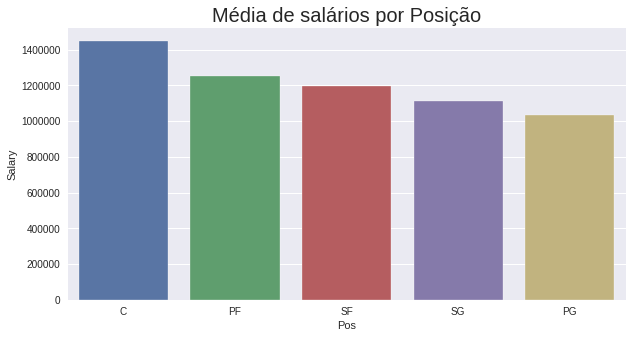

In [27]:
#gera os dados
dados = df_group_pos['Salary'].mean().reset_index().sort_values('Salary',ascending=False)
#define tamanho do plot
fig,axes=plt.subplots(figsize=(10,5))
#gera o grafico de barras
bar= sns.barplot(x='Pos',y='Salary',data=dados,ax=axes);
bar.set_title('Média de salários por Posição',fontsize=20);

### A média dos salarios de "SF" e "PG" são praticamente iguais. Há uma diferença maior entre "SG","PG" e "C".

## Testes de hipoteses
### Vamos criar um teste de hipótese para nos dizer se a media salarial de um pivo da NBA é diferente da media salarial da liga.<br> Iremos utilizar o "One sample T-test", esse teste é usado para verificar se hã diferença entre um grupo de amostragem e população.  

#### Hipótese nula = Não há diferença entre as médias
#### Hipótese alternativa = Há diferença entre as médias

In [28]:
#gera as medias salariais
media_sal_geral = round(df_salario['Salary'].mean(),3)
media_sal_pivo = round(df_salario[df_salario['Pos']=='C']['Salary'].mean(),3)
media_sal_pivo,media_sal_geral

(1449275.593, 1214822.854)

In [29]:
#Verificando se a media de salãrio de um Pivo da NBA é realmente estatisticamente maior que a media geral dos jogadores
stats.ttest_1samp(a=df_salario[df_salario['Pos']=='C']['Salary'],popmean=media_sal_geral)


Ttest_1sampResult(statistic=3.7084761679336946, pvalue=0.00024921198156224175)

#### O valor do p-value é praticamente 0%. Isso significa que com 95% de confiança, nós podemos rejeitar a hipótese nula e afirmar que há sim, diferença entre as médias salariais

## 3- Quais são os 5 times que possuem as maiores despesas com salário?

In [30]:
# agrupando salario por "TM" e "Start"
df_group_times = df_salario.groupby(['Tm','Start'])
#gera arquivo com os dados agupados po 'Pos'
dados_times = df_group_times['Salary'].sum().reset_index().sort_values('Salary',ascending=False)
# Excluindo os jogadores que atuaram por mais de um time em um mesmo ano
dados_times = dados_times[dados_times['Tm']!='TOT']

In [31]:
# Criando coluna rank para agrupar top 5 de cada ano
dados_times = dados_times.assign(rnk=dados_times.groupby(['Start'])['Salary'].rank(ascending=False,method='first'))

In [32]:
# Selecionado top 5 de cada ano
dados_times = dados_times[dados_times['rnk'] <=5].sort_values(['Start','rnk'])

In [33]:
# Visualizando o DF criado
dados_times['Start'] = dados_times['Start'].astype('int')

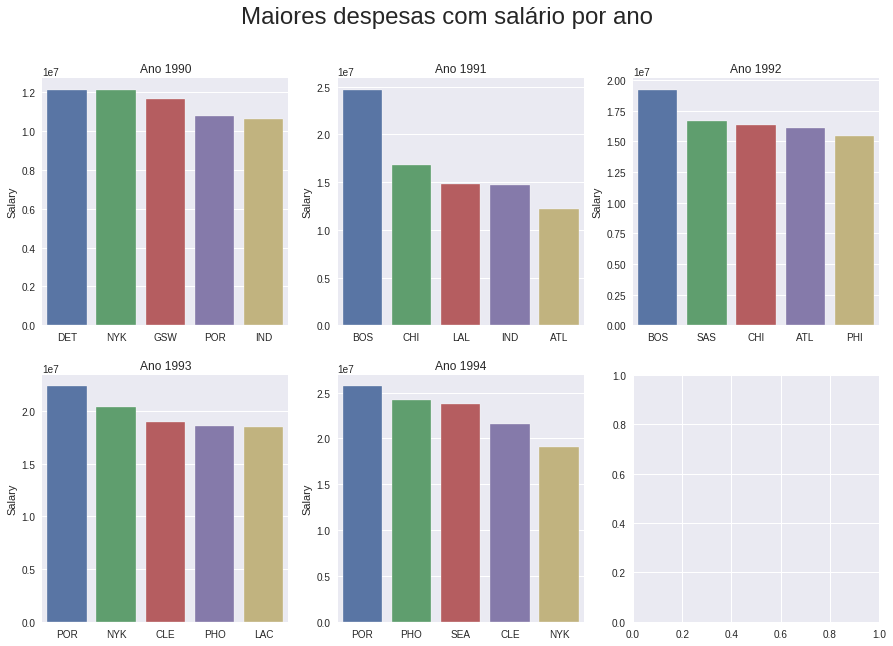

In [35]:
#define tamanho do plot
fig,axes=plt.subplots(2,3,figsize=(15,10))
linha=0
coluna=0
#gera o grafico de barras

for ano in dados_times['Start'].unique():

    bar= sns.barplot(x='Tm',y='Salary',data=dados_times[dados_times['Start']==ano],ax=axes[linha,coluna]);
    bar.set_title('Ano {}'.format(ano));
    bar.set_xlabel('')
    if coluna == 2:
        linha=linha+1
        coluna=0
    else:
        coluna=coluna+1

fig.suptitle('Maiores despesas com salário por ano',fontsize=24);


# Transformação
### Vamos aplicar a técnica de transformar a variável Target, ou seja a variável que queremos prever, em uma distribuição normal.
### Abaixo iremos converter a variável "Salary" para o seu log.


Skew: -0.7907388708170923
Kurtosis : 1.0570216198055924


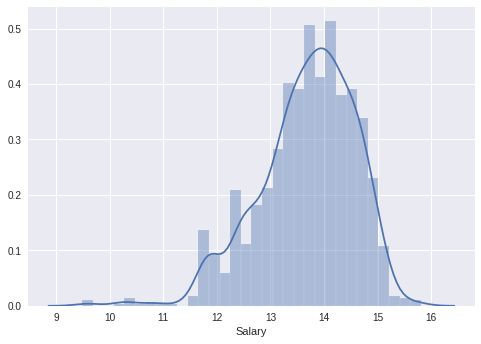

In [36]:
df_salario['Salary']=np.log(df_salario['Salary'])
#sns.set()
sns.distplot(df_salario['Salary']);
print('Skew:' ,df_salario['Salary'].skew())
print('Kurtosis :',df_salario['Salary'].kurt())


### o valor de Skew ficou abaixo de 1, que é um valor aceitável. O valor ideal para uma distribuição normal é 0.

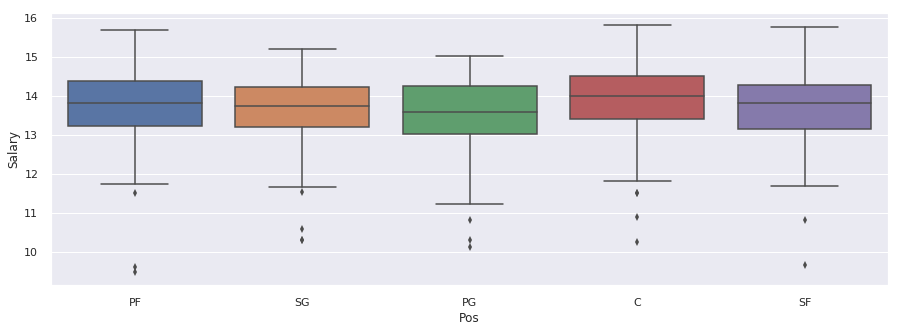

In [37]:
# Salario x Posição
sns.set()
fig, ax=plt.subplots( figsize=(15,5))
#df_salario['Salary'].hist();
sns.boxplot(df_salario['Pos'],df_salario['Salary'],ax= ax);

## Removendo variáveis devido a colinearidade
### Colinearidade ocorre em problemas de regressão onde duas variaveis preditoras tem uma correlação entre si. Quando há uma correlação é alta, uma variavel pode explicar a varição da outra. Quando essas variaveis são utilizadas no modelo, elas não podem prever a variavel target independentemente, no qual reduz a precisão dos coeficientes de cada variavel preditora. 
### A Muilticolinearidade ocorre quando há mais de duas variáveis envolvidas.
### Fonte: https://www.britannica.com/topic/collinearity-statistics
### https://en.wikipedia.org/wiki/Multicollinearity

### Função para remover colinearidade

In [51]:
def remove_collinear_features(x, threshold, target):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between target feature
    y = x['Salary']
    x = x.drop(columns = ['Salary'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    
    # Add the score back in to the data
    x['Salary'] = y
               
    return x

In [66]:
df_salario = remove_collinear_features(df_salario,0.8,'Salary')

### Primeiro, vamos selecionar somente as variáveis numéricas, depois criamos um novo dataframe sem a variavel target( "Salary")

In [44]:
x = df_salario.select_dtypes('float')
x = x.drop(columns='Salary')

In [45]:
#Cria uma constante
x_constant = sm.add_constant(x)

### Para remoção da multicolinearidade iremos utilizar o VIF (Variation Influence Factor). Este metódo é utilizado para detectar multicolinearidade, estimando quanto de variancia de uma regressão é aumentada devido a colinearidade.


In [46]:
cnames = x.columns
dict_vif ={}
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x[yvar],sm.add_constant(x_constant[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    dict_vif.update({yvar:vif})
    print (yvar,round(vif,3))

Start 1.046
Age 1.176
G 3.739
GS 2.794
3PAr 1.856
FTr 1.712
ORB% 3.037
DRB% 3.398
AST% 3.073
STL% 2.391
BLK% 4.314
TOV% 1.662
USG% 2.7
DWS 5.679
DBPM 5.852
3P% 1.698
2P% 1.28
FTA 4.814
FT% 1.531
BLK 4.695
PF 4.616


In [47]:
#cria dataframe com os valores do VIF
df_vif = pd.DataFrame.from_dict(dict_vif,orient='index').reset_index().rename(columns={'index':'nome',0:'valor'})

In [48]:
#ordena os valores 
df_vif.sort_values(by='valor',ascending=False)

,nome,valor
14,DBPM,5.851913
13,DWS,5.678954
17,FTA,4.814260
19,BLK,4.694516
20,PF,4.615647
10,BLK%,4.313576
2,G,3.739248
7,DRB%,3.397787
8,AST%,3.072613
6,ORB%,3.036886


In [43]:
#Exclusao de variáveis com alto valor de VIF
df_salario.drop(columns=['PTS','FG','TRB','DRB','ORB','FT','2PA','2P','3PA','3P','FGA'],inplace=True)
df_salario.drop(columns=['BPM'],inplace=True)
df_salario.drop(columns=['WS'],inplace=True)
df_salario.drop(columns=['TRB%'],inplace=True)
df_salario.drop(columns=['FG%','eFG%'],inplace=True)
df_salario.drop(columns=['PER','OBPM','MP','WS/48'],inplace=True)
df_salario.drop(columns=['TOV','OWS','VORP'],inplace=True)
df_salario.drop(columns=['AST','STL'],inplace=True)
df_salario.drop(columns=['TS%'],inplace=True)



## Correlação

In [49]:
#Correlação
cor = df_salario.corr()

In [50]:
#ordenando pelo valor da correlação "Salary"
np.abs(cor['Salary']).sort_values(ascending=False).head(30)

Salary    1.000000
GS        0.544559
FTA       0.543139
DWS       0.536326
PF        0.496598
G         0.414385
BLK       0.378141
DBPM      0.293008
2P%       0.247369
USG%      0.240131
DRB%      0.194913
TOV%      0.184228
Start     0.183877
Age       0.180971
FT%       0.151554
BLK%      0.135430
AST%      0.067836
FTr       0.065561
3PAr      0.055867
3P%       0.054851
ORB%      0.047536
STL%      0.025161
Name: Salary, dtype: float64

## Tratamento Outliers
#### Vamos utilizar o z-score para identificar os outilers das 2 variaveis mais correlacionada com a variável target "Salary"

### Visualizando relacionamento das variaveis "GS", "ORB" e "Salary"

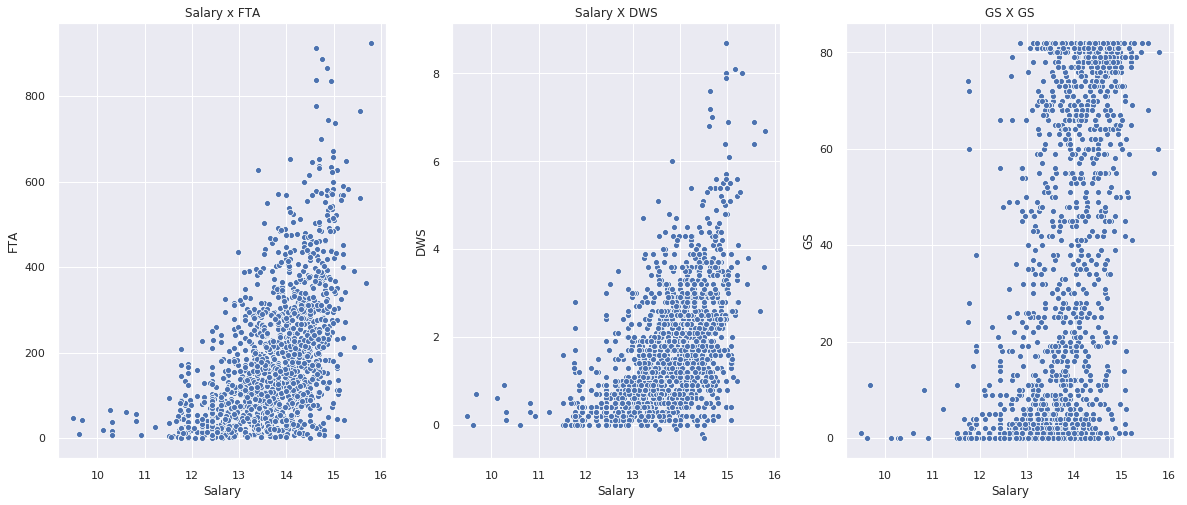

In [51]:
fig,axes=plt.subplots(1,3,figsize=(20,8))
sns.set()

sns.scatterplot(x= 'Salary',y='FTA',data=df_salario,ax=axes[0]).set_title('Salary x FTA');
sns.scatterplot(x= 'Salary',y='DWS',data=df_salario,ax=axes[1]).set_title('Salary X DWS');
sns.scatterplot(x= 'Salary',y='GS',data=df_salario,ax=axes[2]).set_title('GS X GS');


In [52]:
df_salario['FTA_zscore'] = stats.zscore(df_salario['FTA'])
df_salario['DWS_zscore'] = stats.zscore(df_salario['DWS'])
df_salario['GS_zscore'] = stats.zscore(df_salario['GS'])


### Remove os registros com valores > 3 e < -3

In [53]:
df_salario = df_salario[(df_salario['DWS_zscore']< 3) | (df_salario['DWS_zscore']> -3) ]
df_salario = df_salario[(df_salario['FTA_zscore']< 3) | (df_salario['FTA_zscore']> -3) ]
df_salario = df_salario[(df_salario['GS_zscore']< 3) | (df_salario['GS_zscore']> -3) ]

In [54]:
df_salario.drop(['DWS_zscore','FTA_zscore','GS_zscore'],axis=1,inplace=True)

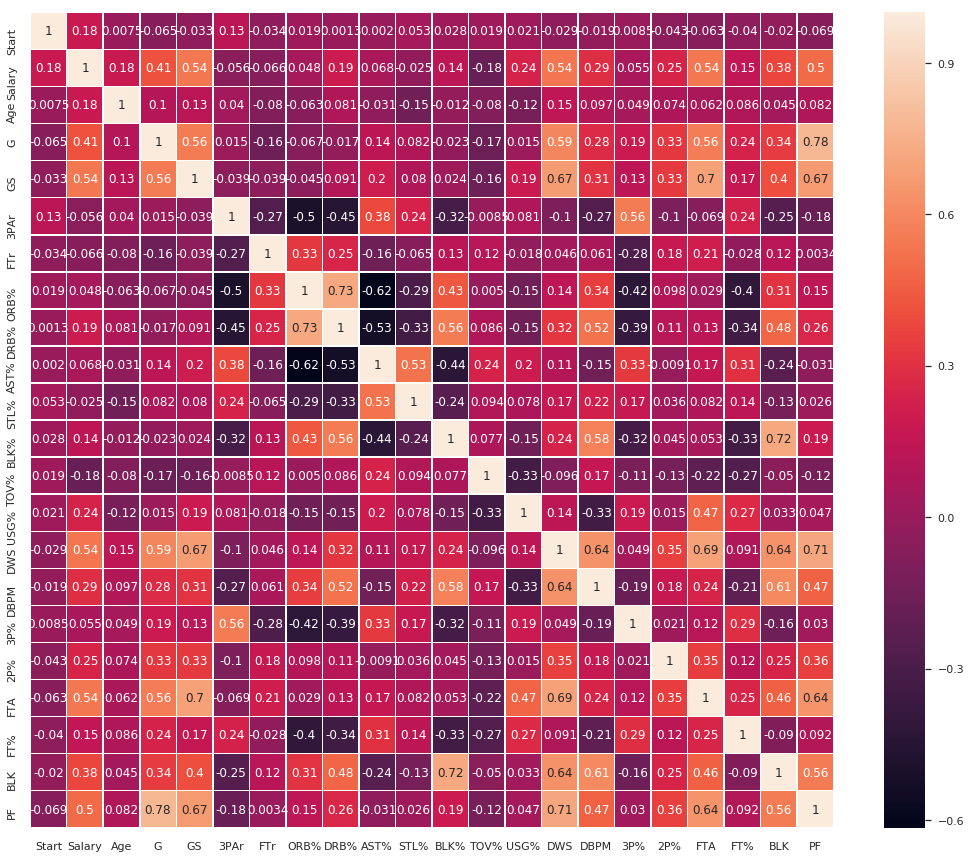

In [55]:
#Gerando Heatmap com a correlação
sns.set_style("whitegrid")
#variaveis = ['Salary','WS','VORP','OWS','MP','DWS','Age','BPM','USG%' ,'NBA_DraftNumber']
corr_variaveis = df_salario.corr() 
plt.figure(figsize=(18,15))
sns.heatmap(corr_variaveis ,annot = True,linewidths=.5);

## Criando novas variáveis para ajudar no relacionamento não linear 

In [56]:
df_salario['FTA_2']= df_salario['FTA']**2
df_salario['FTA_3']= df_salario['FTA']**3
df_salario['FTA_SQRT']=np.sqrt(df_salario['FTA'])

df_salario['DWS_2']= df_salario['DWS']**2
df_salario['DWS_3']= df_salario['DWS']**3
#df_salario['DWS_SQRT']=np.sqrt(df_salario['DWS'])

df_salario['GS_2']= df_salario['GS']**2
df_salario['GS_3']= df_salario['GS']**3
df_salario['GS_SQRT']=np.sqrt(df_salario['GS'])

df_salario['PF_2']= df_salario['PF']**2
df_salario['PF_3']= df_salario['PF']**3
df_salario['PF_SQRT']=np.sqrt(df_salario['PF'])

df_salario['G_2']= df_salario['G']**2
df_salario['G_3']= df_salario['G']**3
df_salario['G_SQRT']=np.sqrt(df_salario['G'])

df_salario['BLK_2']= df_salario['BLK']**2
df_salario['BLK_3']= df_salario['BLK']**3
df_salario['BLK_SQRT']=np.sqrt(df_salario['BLK'])

df_salario['DBPM_2']= df_salario['DBPM']**2
df_salario['DBPM_3']= df_salario['DBPM']**3
#df_salario['DBPM_SQRT']=np.sqrt(df_salario['DBPM'])

df_salario['2P%_2']= df_salario['2P%']**2
df_salario['2P%_3']= df_salario['2P%']**3
df_salario['2P%_SQRT']=np.sqrt(df_salario['2P%'])

df_salario['Start_2']= df_salario['Start']**2
df_salario['Start_3']= df_salario['Start']**3
df_salario['Start_SQRT']=np.sqrt(df_salario['Start'])

df_salario['USG%_2']= df_salario['USG%']**2
df_salario['USG%_3']= df_salario['USG%']**3
df_salario['USG%_SQRT']=np.cbrt(df_salario['USG%'])

df_salario['Age_2']= df_salario['Age']**2
df_salario['Age_3']= df_salario['Age']**3
df_salario['Age_SQRT']=np.cbrt(df_salario['Age'])



In [57]:
df_salario.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450 entries, 0 to 1449
Data columns (total 58 columns):
Start         1450 non-null float64
Player        1450 non-null object
Salary        1450 non-null float64
Pos           1450 non-null object
Age           1450 non-null float64
Tm            1450 non-null object
G             1450 non-null float64
GS            1450 non-null float64
3PAr          1450 non-null float64
FTr           1450 non-null float64
ORB%          1450 non-null float64
DRB%          1450 non-null float64
AST%          1450 non-null float64
STL%          1450 non-null float64
BLK%          1450 non-null float64
TOV%          1450 non-null float64
USG%          1450 non-null float64
DWS           1450 non-null float64
DBPM          1450 non-null float64
3P%           1450 non-null float64
2P%           1450 non-null float64
FTA           1450 non-null float64
FT%           1450 non-null float64
BLK           1450 non-null float64
PF            1450 non-null floa

In [58]:
df_salario.drop(columns=['DBPM_SQRT','DWS_SQRT'],inplace=True)

## Pairplot
### Verificação de relacionamento das variáveis independentes com a variavel "Salary"

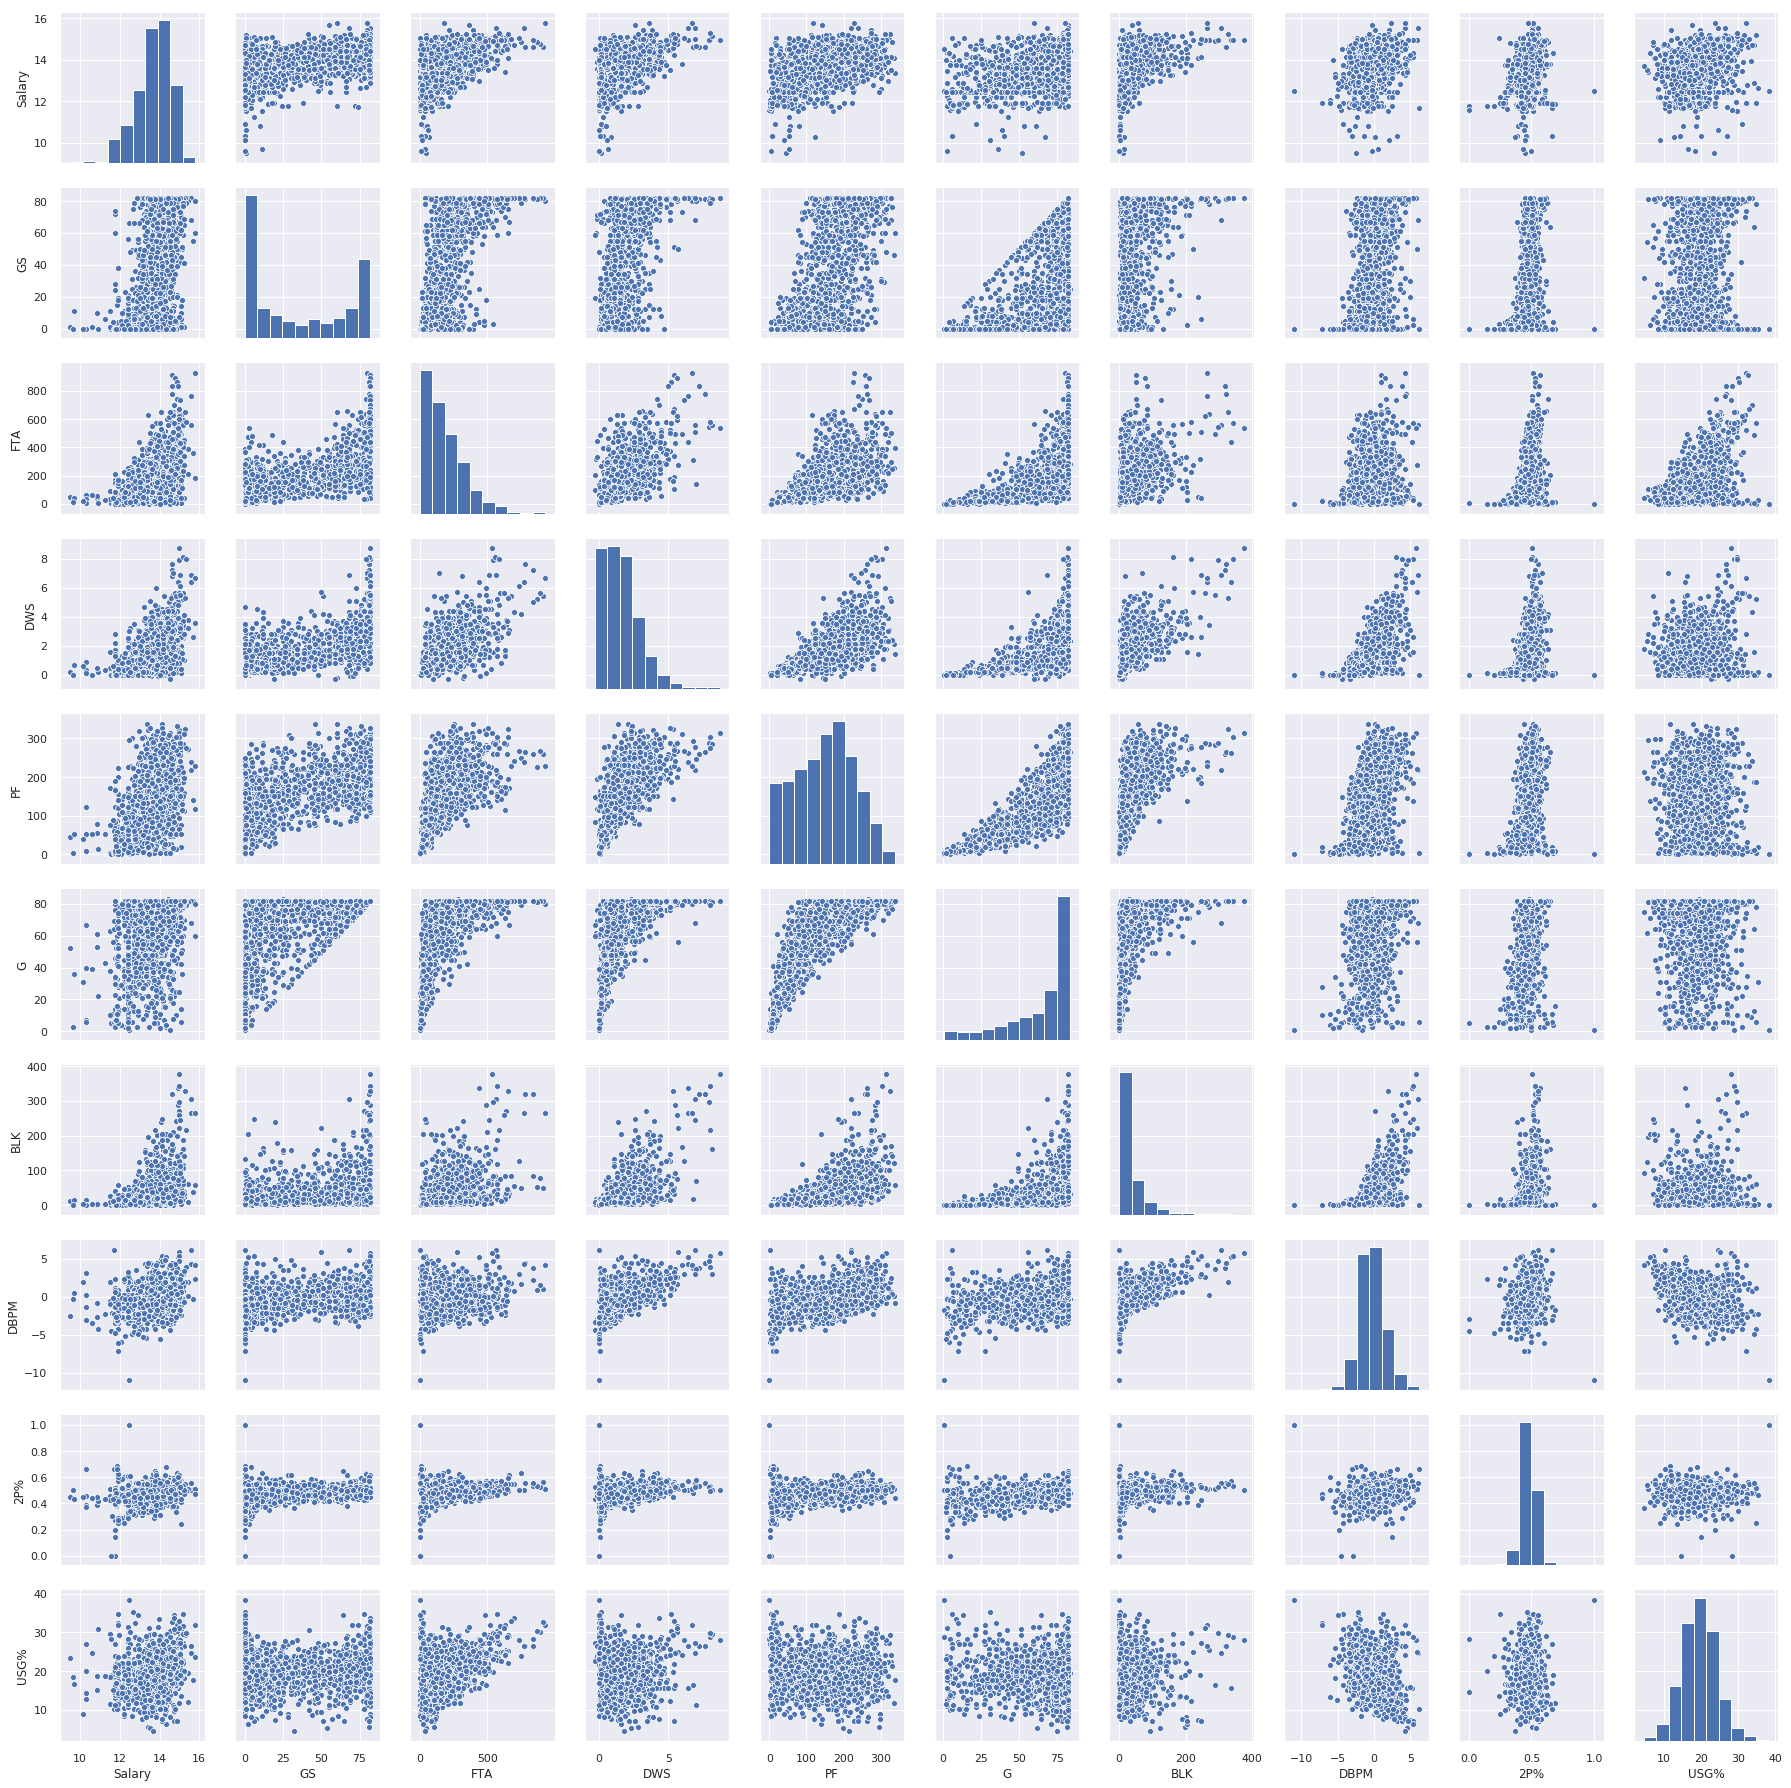

In [59]:
variaveis_corr = cor[abs(cor['Salary'])>0.20][['Salary']].sort_values(by='Salary',ascending=False).index
sns.set()
sns.pairplot(df_salario[variaveis_corr]);

## No gráfico acima, vimos que há algumas variáveis com relacionamento linear quase perfeito (ex: "Pts"-"2P")

In [ ]:
df_salario['GS']

In [ ]:
np.log(df_salario['GS'])

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(10,6))
sns.set()
# Gráficos de distribuição
sns.distplot(df_salario['GS'],ax=axes[0]).set_title('GS');
sns.distplot(np.log(df_salario['GS']),ax=axes[1]).set_title('Raiz quadrada GS');


## Analise Exploratória

## Dataset NBA Full stats
#### https://www.kaggle.com/whitefero/nba-players-advanced-season-stats-19782016#NBA%20Players%20-%20Basic%20Season%20Stats%20(1950-2017).xlsx
## Glossary
#### https://www.basketball-reference.com/about/glossary.html
## Source dataset
https://www.kaggle.com/meicher/201718-advanced-player-metrics-salary

## Normalidade

### Verificando skewness e kurtosis
#### Skew = mede o grau de simetria da distirbuição da variavel:
#####         < 0 - distribuição negativa ou a esquerda  
#####         0 - distrbuição normal 
#####         > 1 - distrbuição positiva ou a direita)

#### kurtosis mede o grau de achatamento da distribuição 
#####         < 0 - é mais alta referente a distrbuição normal  
#####         0 -   possui um achatamento referente a uma distribuição normal 
#####         > 1 - é mais achatada que uma distrbuição normal


In [60]:
for campo in df_salario.select_dtypes(['int','float']):
    print('Skew %s'  % campo, df_salario[campo].skew())
    print('Kurtosis %s ' % campo, df_salario[campo].kurt())
    

Skew Start 0.020232613236895042
Kurtosis Start  -1.2469761783518394
Skew Salary -0.7907388708170923
Kurtosis Salary  1.0570216198055924
Skew Age 0.6120725720875262
Kurtosis Age  -0.21503970172170028
Skew G -1.329798640604979
Kurtosis G  0.8241429949168446
Skew GS 0.3198297133362463
Kurtosis GS  -1.568129661238708
Skew 3PAr 1.6360084702051538
Kurtosis 3PAr  2.4990176130853614
Skew FTr 3.8818557132761558
Kurtosis FTr  35.44598959103481
Skew ORB% 0.6357142932574682
Kurtosis ORB%  0.25942157109673936
Skew DRB% 0.5697471870543029
Kurtosis DRB%  -0.2440674971813941
Skew AST% 1.1768163456229264
Kurtosis AST%  1.187263714679867
Skew STL% 1.3298835667813933
Kurtosis STL%  6.763474690856865
Skew BLK% 2.3363615403875633
Kurtosis BLK%  7.738335706519048
Skew TOV% 1.4270274143335107
Kurtosis TOV%  7.538539639998757
Skew USG% 0.13528256581304515
Kurtosis USG%  0.3722642183729734
Skew DWS 1.3149477409743247
Kurtosis DWS  2.5537244597264364
Skew DBPM 0.10997513128964485
Kurtosis DBPM  1.45871464824470

## Preparação do dataset para criação do modelo

In [61]:
#Criação das variaveis dummies
df_salario_pos = pd.get_dummies(df_salario['Pos'],drop_first=True)

In [62]:
df_salario_pos.rename(columns={'PF':'PPF'},inplace=True)

In [63]:
#df_salario.drop(['Player','Pos'],axis=1,inplace=True)
df_modelo = df_salario.merge(df_salario_pos,left_index =True,right_index=True, how='inner')

In [64]:
df_modelo.drop(['Pos','Tm','Player'],inplace=True,axis=1)

In [65]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

## Criação do Modelo
### 1 - OLS
### Vamos criar esse primeiro modelo sem nenhum tipo de transformação e também sem criação de novas variáveis, apenas utilizando as variaveis com maior grau de correlaçao em relação ao salário


In [86]:
#df_salario.drop(['VORP','WS','DWS'],axis=1,inplace=True)
#variaveis = variaveis.drop(['VORP','WS','DWS'])
#Preenchendo os valore nulos com a media 
df_salario['VORP'] = df_salario['VORP'].fillna(df_salario['VORP'].mean())
df_salario['PER'] = df_salario['VORP'].fillna(df_salario['PER'].mean())
df_salario['WS'] = df_salario['VORP'].fillna(df_salario['WS'].mean())
df_salario['DWS'] = df_salario['VORP'].fillna(df_salario['DWS'].mean())

In [140]:
df_salario_ols = df_modelo

#Separando arquivo em treino e teste
X_train,X_test,y_train,y_test = train_test_split(df_salario_ols.loc[:,df_salario_ols.columns !='Salary'],df_salario_ols.loc[:,'Salary'])

In [136]:
X_train.tail()

,Start,Age,G,GS,3PAr,FTr,ORB%,DRB%,AST%,STL%,...,Age_2,Age_3,Age_SQRT,PPF,PG,SF,SG,Age_X_G,Age_X_FTA,Age_X_DWS
105,1994.0,25.0,76.0,4.0,0.191,0.252,3.3,7.2,22.7,2.2,...,625.0,15625.0,2.924018,0,1,0,0,1900.0,3275.0,35.0
1281,1991.0,27.0,51.0,38.0,0.008,0.408,12.2,14.4,6.3,1.1,...,729.0,19683.0,3.000000,1,0,0,0,1377.0,6966.0,24.3
460,1991.0,30.0,82.0,82.0,0.037,0.312,5.9,10.0,9.5,1.5,...,900.0,27000.0,3.107233,1,0,0,0,2460.0,6270.0,51.0
697,1994.0,24.0,72.0,7.0,0.301,0.319,3.2,10.8,21.0,4.2,...,576.0,13824.0,2.884499,0,0,0,1,1728.0,2928.0,31.2
966,1993.0,27.0,45.0,45.0,0.166,0.298,1.1,9.1,20.2,1.5,...,729.0,19683.0,3.000000,0,0,0,1,1215.0,6291.0,24.3


In [141]:
#treina o modelo
X = sm.add_constant(X_train)
model= sm.OLS(y_train,X).fit()

In [142]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     24.30
Date:                Sat, 30 Mar 2019   Prob (F-statistic):          3.71e-150
Time:                        21:10:52   Log-Likelihood:                -966.06
No. Observations:                1087   AIC:                             2046.
Df Residuals:                    1030   BIC:                             2331.
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0018      0.034      0.054      0.957      -0.065       0.069
Start          1.1729     22.760      0.052      0.959     -43.488      45.834
Age           60.0514     24.531      2.448      0.015      11.916     108.187
G              0.1285      0.086      1.494      0.135      -0.040       0.297
GS             0.0036      0.020      0.178      0.859      -0.036       0.044
3PAr           0.3247      0.238      1.365      0.173      -0.142       0.792
FTr           -0.7608      0.184     -4.139      0.000      -1.121      -0.400
ORB%           0.0027      0.009      0.308      0.758      -0.015       0.020
DRB%           0.0022      0.007      0.320      0.749      -0.011       0.016
AST%           0.0115      0.004      2.660      0.008       0.003       0.020
STL%          -0.1198      0.038     -3.149      0.002      -0.194      -0.045
BLK%          -0.0482      0.031     -1.551      0.121      -0.109       0.013
TOV%          -0.0050      0.005     -0.920      0.358      -0.016       0.006
USG%          -0.1520      0.913     -0.167      0.868      -1.943       1.639
DWS            0.2319      0.217      1.070      0.285      -0.194       0.657
DBPM          -0.0045      0.034     -0.130      0.896      -0.071       0.063
3P%           -0.1701      0.140     -1.214      0.225      -0.445       0.105
2P%           46.5739     15.047      3.095      0.002      17.047      76.101
FTA           -0.0028      0.005     -0.568      0.570      -0.012       0.007
FT%            0.3263      0.191      1.710      0.088      -0.048       0.701
BLK           -0.0140      0.008     -1.804      0.071      -0.029       0.001
PF            -0.0358      0.017     -2.071      0.039      -0.070      -0.002
FTA_2       4.901e-06   6.09e-06      0.805      0.421   -7.05e-06    1.68e-05
FTA_3      -2.568e-09   3.84e-09     -0.669      0.504   -1.01e-08    4.96e-09
FTA_SQRT       0.0941      0.077      1.227      0.220      -0.056       0.245
DWS_2         -0.1042      0.039     -2.695      0.007      -0.180      -0.028
DWS_3          0.0049      0.004      1.406      0.160      -0.002       0.012
GS_2          -0.0002      0.000     -0.605      0.545      -0.001       0.000
GS_3        1.837e-06   2.46e-06      0.747      0.455   -2.99e-06    6.66e-06
GS_SQRT        0.0620      0.070      0.884      0.377      -0.076       0.199
PF_2        7.692e-05   5.16e-05      1.490      0.136   -2.44e-05       0.000
PF_3       -9.523e-08   7.87e-08     -1.210      0.226    -2.5e-07    5.92e-08
PF_SQRT        0.4564      0.184      2.484      0.013       0.096       0.817
G_2           -0.0006      0.001     -0.670      0.503      -0.002       0.001
G_3         2.145e-06   4.75e-06      0.452      0.652   -7.17e-06    1.15e-05
G_SQRT        -1.1574      0.472     -2.452      0.014      -2.084      -0.231
BL

In [143]:
X = sm.add_constant(X_test)
y_pred = model.predict(X)
rmse(y_pred,y_test)
#np.exp(y_test)

0.6255157341761582

In [ ]:
df_salario['Salary'].head(10)

### Analisando o modelo gerado, temos variáveis que possuem um p-value (P>|t|) muito baixo, indicando<br>que é improvavel que a associação da variável independente e "Salary" seja por acaso.

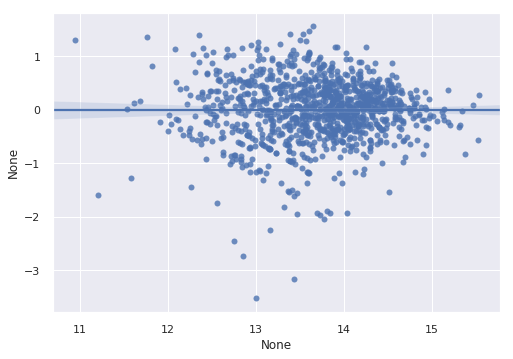

In [71]:
sns.regplot(x= model.fittedvalues,y=model.resid)

## Na regressão linear, os residuos não devem ter correlação com os valores previstos. Nesse caso uma alternativa para este problema seria transformar a variavel dependente, ou seja a coluna "salary" com a raiz quadrada ou o log 


## Cross Validation

In [72]:
modelo_reg = LinearRegression()
score = cross_val_score(modelo_reg,df_salario_ols.loc[:,df_salario_ols.columns !='Salary'],df_salario_ols.loc[:,'Salary'],cv= 15)

In [73]:
score.mean()

0.47224288945766985

## Ridge e Lasso

In [74]:
df_modelo.shape

(1450, 57)

In [116]:
# Seleciona as variaveis numéricas
df_salario_num = df_salario.select_dtypes(include = ['float64']).columns
df_salario_num= df_salario_num.drop('Salary')

In [117]:
#Separando arquivo em treino e teste
X_train,X_test,y_train,y_test = train_test_split(df_modelo.loc[:,df_modelo.columns !='Salary'],df_modelo.loc[:,'Salary'])

In [118]:
std = StandardScaler()
X_train.loc[:,df_salario_num] = std.fit_transform(X_train.loc[:,df_salario_num])
X_test.loc[:,df_salario_num] = std.transform(X_test.loc[:,df_salario_num])

In [132]:
reg = RidgeCV(alphas=[0.01,0.05,0.1,0.3, 0.5, 1.0, 10.0,20.0,30.0,40.0,50.0,60.0], cv=10,normalize=False,fit_intercept=True).fit(X_train,y_train)       
reg.score(X_train,y_train)


0.5108862113364678

In [133]:
reg.alpha_

60.0

In [134]:
y_pred = reg.predict(X_test)
rmse(y_pred,y_test)

0.5811246170239854

In [81]:
for i in range(0,len(reg.coef_)):
    print(X_train.columns[i],reg.coef_[i])

Start 0.04746418350968056
Age 0.20490713611783934
G 0.1349990011547858
GS -0.21075868096058303
3PAr 0.02092279441666937
FTr -0.13675731163423682
ORB% -0.019260719668227524
DRB% 0.020502703642288966
AST% 0.09946634780306347
STL% -0.0864728192869957
BLK% -0.07285210140343391
TOV% -0.035173570709976315
USG% 0.24437703852926948
DWS 0.4929334023924342
DBPM 0.02095815233736503
3P% -0.02405157088358444
2P% -0.12553737783643332
FTA -0.13554496861191828
FT% 0.040470227990269635
BLK -0.4815143256290341
PF -0.20638194157663442
FTA_2 0.058165397551959895
FTA_3 -0.016990596783946228
FTA_SQRT 0.36916265098896467
DWS_2 -0.4543942420321593
DWS_3 0.12264249262865363
GS_2 -0.07514813808654727
GS_3 0.14354491128272623
GS_SQRT 0.27241300296543625
PF_2 -0.12641097556097272
PF_3 0.013622673648474375
PF_SQRT 0.35040930186412006
G_2 0.012045700135687619
G_3 0.008916229815000572
G_SQRT -0.4243338602583312
BLK_2 0.20806682950638167
BLK_3 -0.04203121472063483
BLK_SQRT 0.47249681440910263
DBPM_2 0.040135592404987

## Lasso

In [82]:
lasso = LassoCV(alphas=[0.01,0.03,0.1,0.3,0.5,1.0,5,0, 10.0,20.0,30.0,50.0], cv=10,normalize=False,fit_intercept=True).fit(X_train,y_train)       
lasso.score(X_train,y_train)


0.5308638677489221

In [83]:
y_pred = lasso.predict(X_test)
rmse(y_pred,y_test)

0.5992994589977744

In [114]:
y_pred

array([14.20546882, 14.01704799, 12.1327184 , 14.12245482, 13.79775622,
       14.0921745 , 14.31729597, 13.62616874, 14.35403484, 13.97557492,
       12.97961114, 12.40890673, 13.34936719, 12.8376915 , 13.49722688,
       14.14554744, 13.60800731, 13.34638787, 14.7370537 , 14.67253592,
       12.94148348, 13.23520192, 12.83461965, 14.5298671 , 12.75004695,
       14.6472011 , 14.16689349, 13.57578773, 14.64509455, 14.43003347,
       14.35411286, 13.80417097, 14.48259786, 12.76092493, 14.24443953,
       13.14579371, 14.11977435, 12.64718373, 14.54871661, 14.45025771,
       12.74165293, 15.20102184, 13.41462773, 13.91515381, 14.32457338,
       13.1485748 , 13.57553616, 10.38329216, 14.86839373, 12.82797124,
       12.70396132, 12.3684375 , 12.85179717, 14.35864612, 14.0371225 ,
       13.00897769, 14.10183446, 12.77110516, 13.7127022 , 13.74890771,
       14.40989416, 14.45684116, 14.28966444, 15.05800535, 13.77174926,
       13.86035971, 12.17619462, 13.87734408, 13.34718012, 13.50

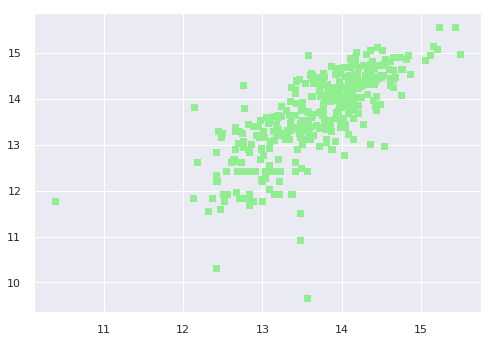

In [84]:
#plt.scatter(y_pred, y_test, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data");

In [85]:
lasso.alpha_

0.0

In [86]:
for i in range(0,len(lasso.coef_)):
    print(X_train.columns[i],lasso.coef_[i])

Start 0.1648482758619138
Age 0.5262690521340957
G 0.4440790565344171
GS -0.22367233646695225
3PAr 0.02244578015156053
FTr -0.14458173824116388
ORB% -0.01775197607367404
DRB% 0.012870796063433934
AST% 0.10356418020269911
STL% -0.08259356925645928
BLK% -0.08111859771226855
TOV% -0.032948769875601414
USG% 0.7286212988301882
DWS 0.5672912643614021
DBPM 0.009911223526442681
3P% -0.023915505616823575
2P% -0.31185941760659475
FTA -0.43105231307139835
FT% 0.0389492372699723
BLK -0.6843432197833204
PF 0.02475111640420956
FTA_2 0.2905016363885495
FTA_3 -0.10802678163335791
FTA_SQRT 0.5411509489281487
DWS_2 -0.580898258338207
DWS_3 0.19541102707343097
GS_2 -0.08575282287643768
GS_3 0.16300125115397363
GS_SQRT 0.27482225490201756
PF_2 -0.32739771050807315
PF_3 0.10649996556312136
PF_SQRT 0.2121725196806618
G_2 -0.23575137261703044
G_3 0.10215975166824864
G_SQRT -0.5993364490629145
BLK_2 0.4241857618088003
BLK_3 -0.15877518538870647
BLK_SQRT 0.5803279262063807
DBPM_2 0.04237760943620397
DBPM_3 0.07

## Adicionando termo de interação

In [105]:
df_salario_ols['Age_X_DWS'] = df_salario_ols['Age'] * df_salario_ols['DWS']
#Separando arquivo em treino e teste
X_train,X_test,y_train,y_test = train_test_split(df_salario_ols.loc[:,df_salario_ols.columns !='Salary'],df_salario_ols.loc[:,'Salary'])

In [106]:
#treina o modelo
X = sm.add_constant(X_train)
model= sm.OLS(y_train,X).fit()

In [107]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     23.63
Date:                Sat, 30 Mar 2019   Prob (F-statistic):          9.70e-147
Time:                        21:01:12   Log-Likelihood:                -956.73
No. Observations:                1087   AIC:                             2027.
Df Residuals:                    1030   BIC:                             2312.
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0130      0.034     -0.382      0.702      -0.080       0.054
Start         -8.6016     22.553     -0.381      0.703     -52.857      35.654
Age           57.5540     20.515      2.805      0.005      17.298      97.810
G              0.2727      0.089      3.053      0.002       0.097       0.448
GS            -0.0151      0.020     -0.741      0.459      -0.055       0.025
3PAr          -0.0252      0.234     -0.108      0.914      -0.485       0.434
FTr           -0.9448      0.189     -5.003      0.000      -1.315      -0.574
ORB%          -0.0028      0.009     -0.311      0.756      -0.020       0.015
DRB%           0.0036      0.007      0.529      0.597      -0.010       0.017
AST%           0.0122      0.004      2.823      0.005       0.004       0.021
STL%          -0.0883      0.038     -2.332      0.020      -0.163      -0.014
BLK%          -0.0170      0.031     -0.549      0.583      -0.078       0.044
TOV%          -0.0094      0.005     -1.759      0.079      -0.020       0.001
USG%           0.5097      0.802      0.636      0.525      -1.063       2.083
DWS            0.1892      0.213      0.888      0.375      -0.229       0.607
DBPM           0.0002      0.034      0.006      0.995      -0.067       0.067
3P%           -0.0311      0.140     -0.222      0.824      -0.307       0.244
2P%          -40.8487     92.190     -0.443      0.658    -221.751     140.054
FTA           -0.0063      0.005     -1.249      0.212      -0.016       0.004
FT%            0.5844      0.198      2.954      0.003       0.196       0.973
BLK           -0.0106      0.008     -1.395      0.163      -0.026       0.004
PF            -0.0129      0.016     -0.820      0.412      -0.044       0.018
FTA_2       8.023e-06    6.6e-06      1.215      0.225   -4.93e-06     2.1e-05
FTA_3      -4.144e-09   4.37e-09     -0.948      0.343   -1.27e-08    4.43e-09
FTA_SQRT       0.1642      0.079      2.072      0.039       0.009       0.320
DWS_2         -0.0856      0.039     -2.219      0.027      -0.161      -0.010
DWS_3          0.0038      0.004      1.054      0.292      -0.003       0.011
GS_2           0.0001      0.000      0.368      0.713      -0.001       0.001
GS_3       -4.229e-07   2.45e-06     -0.173      0.863   -5.23e-06    4.38e-06
GS_SQRT        0.1160      0.070      1.660      0.097      -0.021       0.253
PF_2        2.371e-05   4.65e-05      0.510      0.610   -6.76e-05       0.000
PF_3       -3.107e-08   6.99e-08     -0.445      0.657   -1.68e-07    1.06e-07
PF_SQRT        0.1790      0.168      1.067      0.286      -0.150       0.508
G_2           -0.0025      0.001     -2.669      0.008      -0.004      -0.001
G_3         1.215e-05   4.87e-06      2.492      0.013    2.58e-06    2.17e-05
G_SQRT        -1.7047      0.485     -3.515      0.000      -2.656      -0.753
BL

In [109]:
lasso = LassoCV(alphas=[0.01,0.05,0.1, 0.5, 1.0, 10.0,20.0], cv=10,fit_intercept=True).fit(X_train,y_train)       
lasso.score(X_train,y_train)


0.5228265190489991

In [154]:
lasso.alpha_

0.01

In [155]:
for i in range(0,len(lasso.coef_)):
    print(X_train.columns[i],lasso.coef_[i])

Start 137.880937393
Age 40.2707852663
G -18.9548630878
GS 0.919831305056
MP 0.810179382262
PER -9.03170905512
TS% -2745.40111469
3PAr -947.663111578
FTr -443.349319488
ORB% -20.1457207029
DRB% 11.1700575015
TRB% -0.0
AST% -30.4298741314
STL% -230.606093722
BLK% -13.9839355645
TOV% 33.4013376802
USG% 61.3735407237
OWS 119.497329736
DWS 292.954226258
WS -0.0
WS/48 -1965.72161055
OBPM 135.217378454
DBPM -0.0
BPM 1.31136762591
VORP -345.347064265
FG 1.08482845863
FGA -0.364129522552
FG% 0.0
3P -0.691521598289
3PA 0.0724841491046
3P% -66.6584073177
2P 1.92441697893
2PA -2.03729480791
2P% 53.7530526352
eFG% -488.08561715
FT -0.594730874984
FTA 1.41876842518
FT% -186.348930224
ORB -0.0
DRB 0.568647972575
TRB 0.0
AST 1.70481248656
STL 0.961288272949
BLK 0.687867954
TOV -1.3694205701
PF -2.95293522415
PTS 0.0
2P_X_BPM 63.9866142331
Start_X_BPM 0.0487702589897


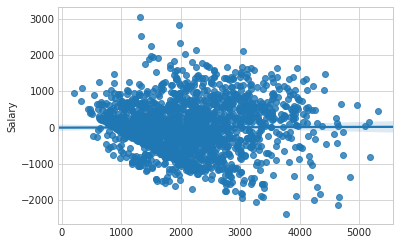

In [156]:
sns.regplot(lasso.predict(X_train) ,(y_train - lasso.predict(X_train)));

## VIF - Variance Inflation Factor

### Metodo utilizado para identificar multicolinearidade

In [55]:
cnames = X_train.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(X_train[yvar],sm.add_constant( X_train[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print (yvar,round(vif,3))

2P 101.783
FGA 28.16
2PA 115.324
OWS 4.276
GS 3.589
DRB 51.964
MP 11.694
DWS 4.774
TRB 48.68
BPM 2.678
